In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as mp  
import math  
%matplotlib inline

In [5]:
data =  pd.DataFrame ( {
    'Ukranian': np.around(np.random.normal(160,20,10)), 
    'Math':  np.around(np.random.normal(160,20,10)), 
    'physics': np.around(np.random.normal(160,20,10)),
})  

data

,Ukranian,Math,physics
0,167.0,151.0,180.0
1,196.0,174.0,163.0
2,170.0,141.0,192.0
3,146.0,182.0,158.0
4,205.0,148.0,154.0
5,126.0,139.0,149.0
6,169.0,168.0,162.0
7,146.0,140.0,186.0
8,198.0,186.0,142.0
9,180.0,189.0,175.0


In [6]:
c_names=list(data.columns) 
first_values=np.array(data[c_names[0]]) 
second_values=np.array(data[c_names[1]]) 
third_values=np.array(data[c_names[2]])  


n_data= pd.DataFrame({'mean' : {'Ukranian': np.mean(first_values), 'Math' :np.mean(second_values),'physics':np.mean(third_values)},
        'standard deviation': {'Ukranian':np.std(first_values), 'Math':np.std(second_values),'physics':np.std(third_values)}, 
                     }) 
n_data

,mean,standard deviation
Ukranian,170.3,24.253041
Math,161.8,19.119623
physics,166.1,15.655351


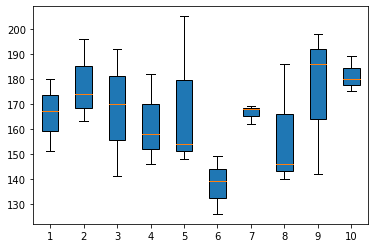

In [7]:
mp.boxplot(data, vert=True,patch_artist=True);

In [9]:
def take_column_data(data): 
    arr_with_val=[]
    c_names=list(data.columns) 
    for val in range(len(c_names)):
        arr_with_val.append(np.array(data[c_names[val]]))
    return arr_with_val

def get_T_range(data):
    arr_with_val=take_column_data(data)
    arr_with_summ=list(map(np.sum,arr_with_val))   
    arr_with_T_summ =list(map(lambda x:x*x,arr_with_summ))
    F_T=np.sum(arr_with_T_summ)
    return arr_with_summ, F_T 

def get_n(data): 
    n=int(len(data))
    return n 

def get_c():
    c=int(len(data.columns))
    return c

def get_N():
    n=get_n(data)
    n_of_columns=get_c()
    N= n*n_of_columns
    return N

def get_the_square_of_the_total(): 
    col_meanings=get_T_range(data)[0]
    square_of_the_total=np.power(np.sum(col_meanings),2)
    return square_of_the_total
   
def get_sum_squar_ind_val():
    col_meanings=np.array(take_column_data(data)).flatten()
    s_squar_ind_val=float(sum((list(map(lambda x:x*x,col_meanings)))))
    return s_squar_ind_val

In [11]:
def get_SS_intra_group(): #SSфакт
    S_F=get_T_range(data)[1]
    n=get_n(data)
    square_of_the_total_x=get_the_square_of_the_total()
    N=get_N()
    SS_fa=(S_F/n)-(square_of_the_total_x/N)
    return SS_fa

In [13]:
def get_SS_total_group(): #SSзаг
    s_sq_ind_val=get_sum_squar_ind_val() 
    square_of_the_total_x=get_the_square_of_the_total()
    N=get_N() 
    SS_total_group=float(s_sq_ind_val - (square_of_the_total_x/N))
    return SS_total_group

In [14]:
def get_SS_accidentally():
    SS_total_gr=get_SS_total_group() #SSзаг
    SS_intr_gr=get_SS_intra_group() #SSфакт
    SS_accid=SS_total_gr-SS_intr_gr
    return SS_accid 

In [15]:
def get_d_fact():
    c=get_c()
    d_fact=int(c-1)
    return d_fact

In [16]:
def get_d_comm():
    N=get_N()
    d_comm=N-1
    return d_comm

In [17]:
def get_d_accidentally():
    d_fact=get_d_fact()
    d_comm=get_d_comm() 
    d_acc=d_comm-d_fact
    return d_acc

In [18]:
def get_MS_SS_fact():
    SS_fact=get_SS_intra_group()
    d_fact=get_d_fact() 
    MS_SS_fact=SS_fact/d_fact 
    return MS_SS_fact

In [19]:
def get_MS_SS_accidentally():
    SS_acc=get_SS_accidentally()
    d_acc=get_d_accidentally() 
    MS_SS_acc=SS_acc/d_acc 
    return MS_SS_acc

get_MS_SS_accidentally()

444.0222222222214

In [20]:
def get_F_emp():
    MS_SS_fact=get_MS_SS_fact()
    MS_SS_acc=get_MS_SS_accidentally() 
    F_emp=(MS_SS_fact)/(MS_SS_acc)
    return F_emp 

get_F_emp()

0.40681147089741443

In [22]:
def get_F_crit(): 
    f_up=round(get_MS_SS_fact()) 
    f_down=round(get_MS_SS_accidentally()) 
    F_values=pd.read_excel("Фішера.xlsx")   
    if(f_up>40 and f_down>130):
        return F_values.iloc[31,14] 
    elif(f_down>31):
        return F_values.iloc[f_up,14] 
    elif(f_up>40): 
        return F_values.iloc[31,f_down] 
    else:
        return F_values.iloc[f_up,f_down] 
    

print(get_F_crit())

1


In [23]:
def conclusion():
    F_em=get_F_emp()
    F_crit=get_F_crit() 
    if(F_em>F_crit):
        print('The averages of independent groups are not equal')
    else:
        print("The averages of independent groups are  equal")
    
conclusion()

The averages of independent groups are  equal


In [24]:
def out():
    counted_data = pd.DataFrame({
        'Intragroup Variance':get_SS_intra_group(), 
        'Groupwide Variance':get_SS_total_group(), 
        "Residual variance":  get_SS_accidentally(), 
        "The number of degrees of freedom (fact)":pd.Series(get_d_fact()), 
        "The number of degrees of freedom (comm)":pd.Series(get_d_comm()), 
        "The number of degrees of freedom (accident)":pd.Series(get_d_accidentally()), 
        "MS actual":get_MS_SS_fact(), 
        "MS accidentally":get_MS_SS_accidentally(), 
        'F empr':get_F_emp(), 
        'F tabl':get_F_crit(),
    }) 
    
    print(counted_data)
    
out()

   Intragroup Variance  Groupwide Variance  Residual variance  \
0           361.266667        12349.866667            11988.6   

   The number of degrees of freedom (fact)  \
0                                        2   

   The number of degrees of freedom (comm)  \
0                                       29   

   The number of degrees of freedom (accident)   MS actual  MS accidentally  \
0                                           27  180.633333       444.022222   

     F empr  F tabl  
0  0.406811       1  
